In [1]:
import numpy as np
import os, random, copy
import pandas as pd
import datetime as date
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
warnings.simplefilter (action = 'ignore', category = [FutureWarning,Warning])

try: ## In order to open and save dictionaries
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle
plt.style.use('ggplot')

from LIBS.LSS import *
from LIBS.LSS_connector import run_and_retrieve

2023-09-19 11:03:05.223354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-19 11:03:05.223388: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
class F_temp ():
    
    def __init__(self):
        self.evaluation_counter = 0
        self.with_configurations = False
    def new_configuration (self):
        return _

def get_cumulative_evolution (F_min, L_y):
    cummulative = np.zeros(F_min.shape[1])
    Values = []
    for val_y in L_y:
        Values.append(np.sum(F_min >= val_y, axis = 0) - cummulative)
        cummulative = np.sum(F_min >= val_y, axis = 0)
    Values = [val/F_min.shape[0] for val in Values]
    
    return np.array(Values)

# Visualizing 1D picture

In [3]:
G = F_temp()

L_xx = np.reshape( .2* np.arange(1,6), (-1,1))
L_yy = run_and_retrieve (
    G, input_name = "input_name", output_name = "output_name", program_name = "query.py", 
    x_active_agents=L_xx)

2023-09-19 11:03:08.718720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-19 11:03:08.718766: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-19 11:03:08.718793: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rafamonteiro-XPS-13-9350): /proc/driver/nvidia/version does not exist
2023-09-19 11:03:08.719268: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
x = np.linspace(0,1, num=200).reshape(-1,1)

G = F_temp()
F = F_temp()
y = run_and_retrieve (G, input_name = "input_name", output_name = "output_name", 
                      program_name = "query.py", x_active_agents= x)

T_x = np.reshape(.2* np.arange(1,5), (-1,1))
L_x = np.reshape(-.1 + .2* np.arange(1,6), (-1,1))
T_y = run_and_retrieve (
    G, input_name = "input_name", output_name = "output_name", program_name = "query.py",
    x_active_agents=T_x)
L_y = run_and_retrieve (
    G, input_name = "input_name", output_name = "output_name", program_name = "query.py",
    x_active_agents=L_x)

y_labels = np.ravel(np.concatenate((T_y.numpy ()[::-1], L_y.numpy ()), axis = 0))

x_labels = .1  + .2 * np.arange(5)
L_y = np.round(L_y,3)

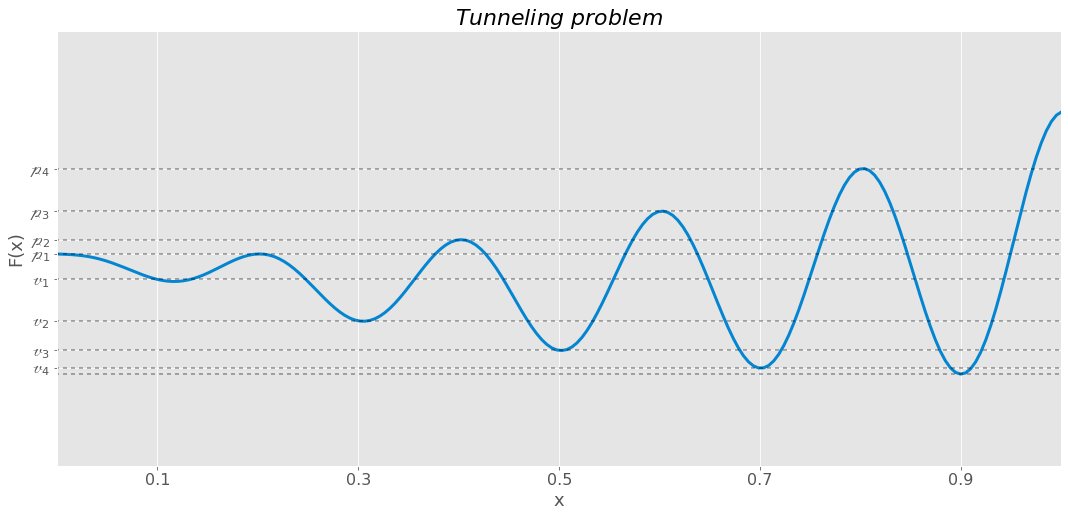

In [5]:
fig, ax = plt.subplots (figsize = (18,8))
ax.plot(x,y, lw = 3, color = "xkcd:cerulean")
ax.hlines (y = T_y, xmin= -.1, xmax = 1.1, linestyles= (3,(0,1,1)), color = "k", alpha = .3, lw = 2)
ax.hlines (y = L_y,  xmin= -.1, xmax = 1.1, linestyles= (3,(0,1,1)), color = "k", alpha = .3, lw = 2)
ax.grid(True, axis = 'x')
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("F(x)", fontsize = 18)
### Filling with colors
ax.set_ylim([-.5, 3])
ax.set_xlim([0, 1])
### Ticks
ax.set_xticks(x_labels, fontsize = 16)
ax.set_yticks(y_labels[:-1], fontsize = 16)
ax.set_yticklabels(
    [
        r"$\mathscr{p}_4$", 
        r"$\mathscr{p}_3$", 
        r"$\mathscr{p}_2$", 
        r"$\mathscr{p}_1$", 
        r"$\mathscr{v}_1$", 
        r"$\mathscr{v}_2$", 
        r"$\mathscr{v}_3$", 
        r"$\mathscr{v}_4$"
    ],
    fontsize = 16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_title(r"$\it{Tunneling}$ $\it{problem}}$", fontsize = 22)
plt.show ()

# Plotting 2D

In [6]:
x = np.linspace(0,1, num=200).reshape(-1,1)

XX, YY= np.meshgrid(x,x)

X = XX, YY
X = np.hstack([np.ravel(a, order = "F").reshape(-1,1) for a in X])

G = F_temp()
F = F_temp()
y = run_and_retrieve (G, input_name = "input_name", output_name = "output_name", 
                      program_name = "query.py", x_active_agents = X)

Z = np.reshape(y, XX.shape )

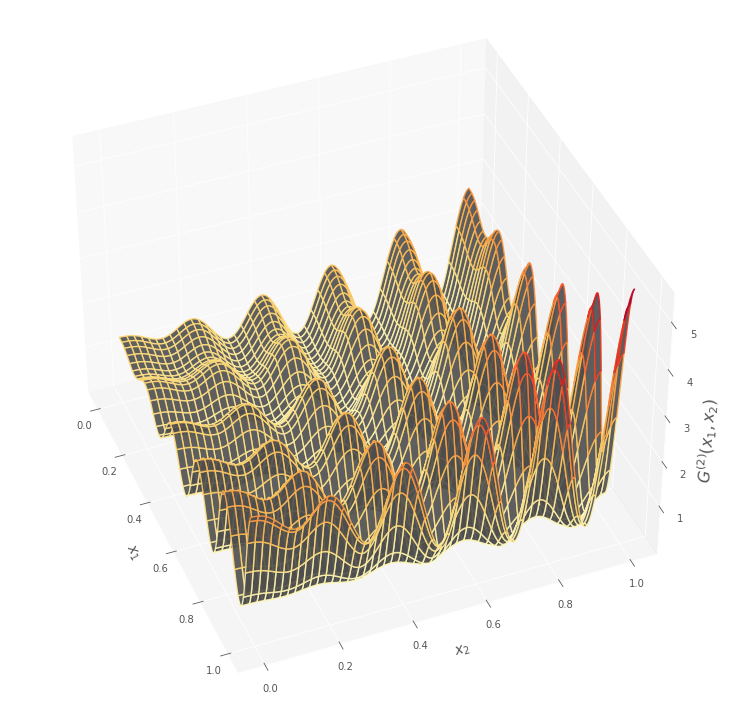

In [7]:
fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection ='3d', facecolor = "w")

norm = plt.Normalize(Z.min(), Z.max())
colors = mpl.cm.YlOrRd(norm(Z))
rcount, ccount, _ = colors.shape

surf = ax.plot_surface(XX, YY, Z, rcount=50, ccount=50,
                       facecolors=colors, shade = False, lw = 1.4, alpha = .9)
surf.set_facecolor((0.3,0.3,0.3,0.3))

ax.set_xlabel(xlabel=r"$x_1$", fontsize = 14)
ax.set_ylabel(r"$x_2$", fontsize = 14)
ax.set_zlabel(r"$G^{(2)}(x_1,x_2)$", fontsize = 16)
ax.view_init(40,-22)
plt.tight_layout()
plt.show()

# Tunneling problems

In [8]:
x = np.linspace(0,1, num=200).reshape(-1,1)

G = F_temp()
F = F_temp()
y = 15*run_and_retrieve (G, input_name = "input_name", output_name = "output_name", 
                      program_name = "query.py", x_active_agents= x)

In [9]:
positions = [2,26, 89, 191]
a = x[positions,:]
b = y.numpy()[positions,:]

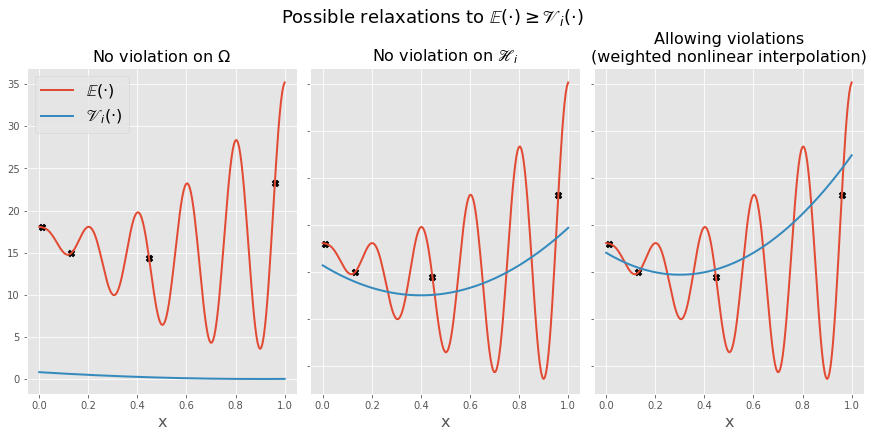

In [10]:

fig = plt.figure(figsize=[15,6])
gs = gridspec.GridSpec(1,3)
gs.update(wspace=0.05)

fig.suptitle(
    r"Possible relaxations to $\mathbb{E}(\cdot) \geq \mathscr{V}_i(\cdot)$",
    fontsize = 18, y = 1.02)
ax0 = fig.add_subplot(gs[0,0])
z1 = (x - .9)**2
ax0.plot(x,y, lw = 2, label = r"$\mathbb{E}(\cdot)$")
ax0.plot(x,z1, lw = 2, label = r"$\mathscr{V}_i(\cdot)$")
ax0.set_title(r"No violation on $\Omega$", fontsize = 16)
ax0.scatter(a,b, s = 40, marker = "X", c = "k", linewidths = 1)
ax0.set_xlabel("x", fontsize= 16)
ax0.legend(fontsize = 16)

ax1 = fig.add_subplot(gs[0,1])
z2 = 12.5+20*(x - .4)**2
ax1.plot(x,y, lw = 2)
ax1.plot(x,z2, lw = 2)
ax1.scatter(a,b, s = 40, marker = "X", c = "k", linewidths = 1) 
ax1.set_yticklabels([])
ax1.set_title(r"No violation on $\mathscr{H}_i$", fontsize = 16)
ax1.set_xlabel("x", fontsize= 16)

ax2 = fig.add_subplot(gs[0,2], sharey=ax1)
z2 = 14.7+26*(x - .3)**2
ax2.scatter(a,b, s = 40, marker = "X", c = "k", linewidths = 1)
ax2.plot(x,y, lw = 2)
ax2.plot(x,z2, lw = 2)
ax2.set_yticklabels([])
ax2.set_title("Allowing violations\n(weighted nonlinear interpolation)", fontsize = 16)
ax2.set_xlabel("x", fontsize= 16)

plt.show()

# PLtting data

In [11]:
Unfrozen = {}

for dimension in [1,2,4,8]:
    Unfrozen[dimension] = {}
    for step in [50, 25, 12.5]:

        with open (
            str(dimension)+"/toy_model_"
            +str(dimension)+"D_100_sim_annealing_step_"
            +str(step).replace(".","__") +".pickle",
            'rb') as pickled_dic:
            Unfrozen[dimension][step]  = pickle.load (pickled_dic)   #"multi_armed_False"

In [12]:
for dimension in [1,2,4,8]:    
    for lss_type in ["mlp", "svr"]:
        for multi_arm_type in ["True", "False"]:

            with open (
                str(dimension)+"/50toy_model_"+str(dimension)+"D_lss_"+\
                lss_type+"_multi_armed_"+multi_arm_type+".pickle", 'rb') as pickled_dic:

                aux  = pickle.load (pickled_dic)   

            
            aux= [aux[str(i)][1] for i in range(50)]
            Unfrozen[dimension][lss_type +"_"+ multi_arm_type] = np.hstack(aux).T

In [13]:
Cumulative_evolution = {}

for key_now in Unfrozen[1].keys():
    Cumulative_evolution[key_now] = get_cumulative_evolution(Unfrozen[1][key_now], L_y)

In [14]:
ylabels_for_hitting = {
    12.5: r"SA\n$\Delta =12.5$",
    25: r"SA\n $\Delta =25$", 
    50: r"SA \n $\Delta =50$", 
    'mlp_True': r"MLP w/ MAB",
    'mlp_False': r"MLP",
    'svr_True': r"SVR w/ MAB",
    'svr_False': r"SVR"
}

x = np.linspace(0,1, num=100).reshape(-1,1)

F = F_temp()
y = run_and_retrieve (F, input_name = "input_name", output_name = "output_name", 
                      program_name = "query.py", x_active_agents= x)

cmap = mpl.cm.plasma
colors = cmap([0., .4, .6, .8, .99])

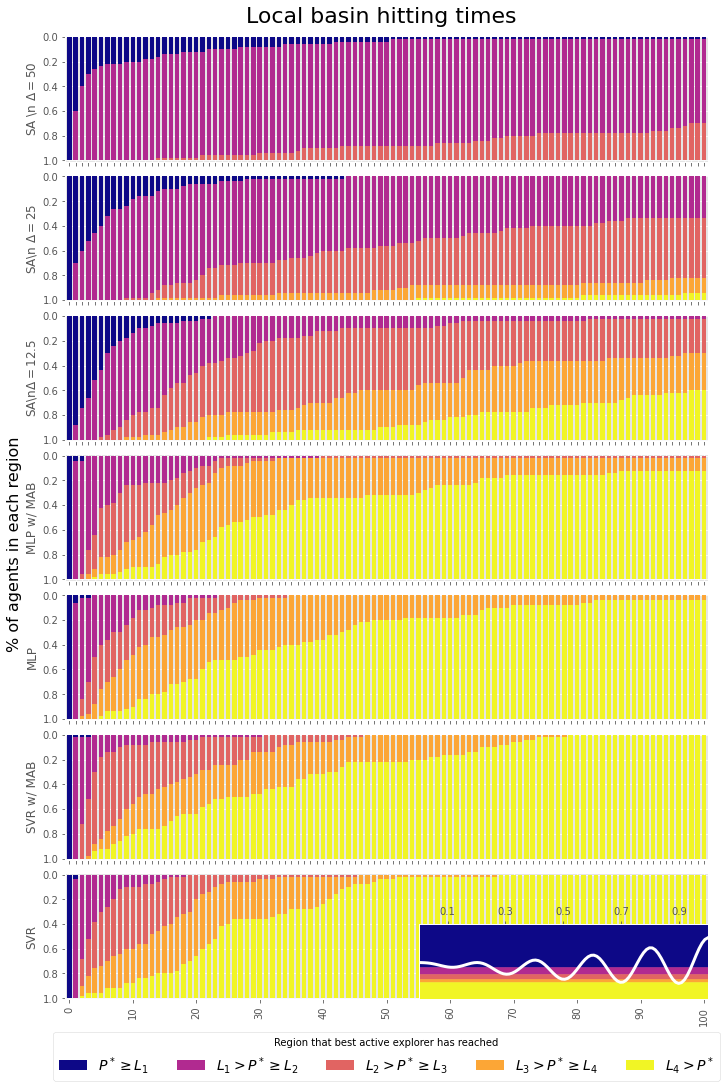

In [15]:
fig,ax = plt.subplots(nrows=7,constrained_layout=True, figsize=(10,15),
                       gridspec_kw={'hspace': 0.005})

for i, key_now in enumerate(Unfrozen[1].keys()):
    
    if i <6:
        plt.setp(ax[i].get_xticklabels(), visible=False)
        
    df = pd.DataFrame(Cumulative_evolution[key_now].T)#, index=index)
    
    df.plot(
        kind='bar', stacked=True, width = .7, 
        color = colors[:6], ax = ax[i], legend = False)

    ax[i].set_ylim([-.01,1.01])
    ax[i].invert_yaxis()

    ax[i].set_ylabel(ylabels_for_hitting[key_now])
    
ax[6].legend(
    [
        r"$P^* \geq L_1$", 
        r"$L_1>P^* \geq L_2$",
        r"$L_2>P^* \geq L_3$", 
        r"$L_3>P^* \geq L_4$",
        r"$L_4>P^*$"
    ],
    title='Region that best active explorer has reached',
    bbox_to_anchor=(0.5, -.2), ncol = 5,  loc='upper center', 
    fontsize = 14,
    facecolor = 'white'
)
ax[6].xaxis.set_ticks(np.arange(0, 101, 10))

#######################################################
ins = ax[6].inset_axes([0.55,0.0,0.45,0.6])
ins.plot(x,y, lw = 3, color = "w")

### Filling with colors
cmap = mpl.cm.plasma#cividis#viridis#Set1#tab20#PuBuGn#seismic #RdYlGn#
colors = cmap([0., .4, .6, .8, .99])

alpha_fill = 1
ins.fill_between(np.ravel(x), L_y[0] + 0 * np.ravel(x), 48 + 0 * np.ravel(x), alpha = alpha_fill,
                color = colors[0])

ins.fill_between(np.ravel(x), L_y[1] + 0 * np.ravel(x), L_y[0] + 0 * np.ravel(x), alpha = alpha_fill,
                color = colors[1])

ins.fill_between(np.ravel(x), L_y[2] + 0 * np.ravel(x), L_y[1] + 0 * np.ravel(x), alpha = alpha_fill,
                color = colors[2])

ins.fill_between(np.ravel(x), L_y[3] + 0 * np.ravel(x), L_y[2] + 0 * np.ravel(x), alpha = alpha_fill,
                color = colors[3])

ins.fill_between(np.ravel(x), -2 + 0 * np.ravel(x), L_y[3] + 0 * np.ravel(x), alpha = alpha_fill,
                color = colors[4])

### Ticks
ins.set_xticks(x_labels, fontsize = 12)
ins.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ins.set_yticks([])
ins.set_ylim([-.5, 3])
ins.set_xlim([0, 1])

fig.text(-0.02, 0.5,r'% of agents in each region', va='center', rotation='vertical', fontsize= 16)
fig.suptitle("Local basin hitting times", fontsize = 22)
plt.show()

# Concentrations

In [30]:
which_model =["svr", "mlp"]
multi_armed =["False","True"]

concentrations = {}
for now in[1,2,4,8]:
    concentrations[now] = {}
    for wm in which_model:
        concentrations[now][wm] = {}
        for ma in multi_armed:
            concentrations[now][wm][ma] = {}
            M = np.zeros((50,100))
            for exp in range(50):
                source =\
                str(now)+"/history_toy_model_"+str(now)+\
                "D_lss_" + wm + "_multi_armed_"+ma+"_exp_"+str(exp)+".pickle"
        
                with open (source, 'rb') as pickled_dic:
                    test = pickle.load (pickled_dic)
                aux =[]
                for j in range(5):
                    for i in range(20):
                        aux.append(
                            test[str(j)]['Epoch '+str(i) +' - eps_low_temp_or_high_temp']
                        )#eps_low_temp_or_high_temp'])#eps_deep_or_breadth
                M[exp,:] = aux
            
            concentrations[now][wm][ma]["matrix"] = M
            concentrations[now][wm][ma]["mean"] = np.mean(M, axis = 0)
            concentrations[now][wm][ma]["std"] = np.std(M, axis = 0)

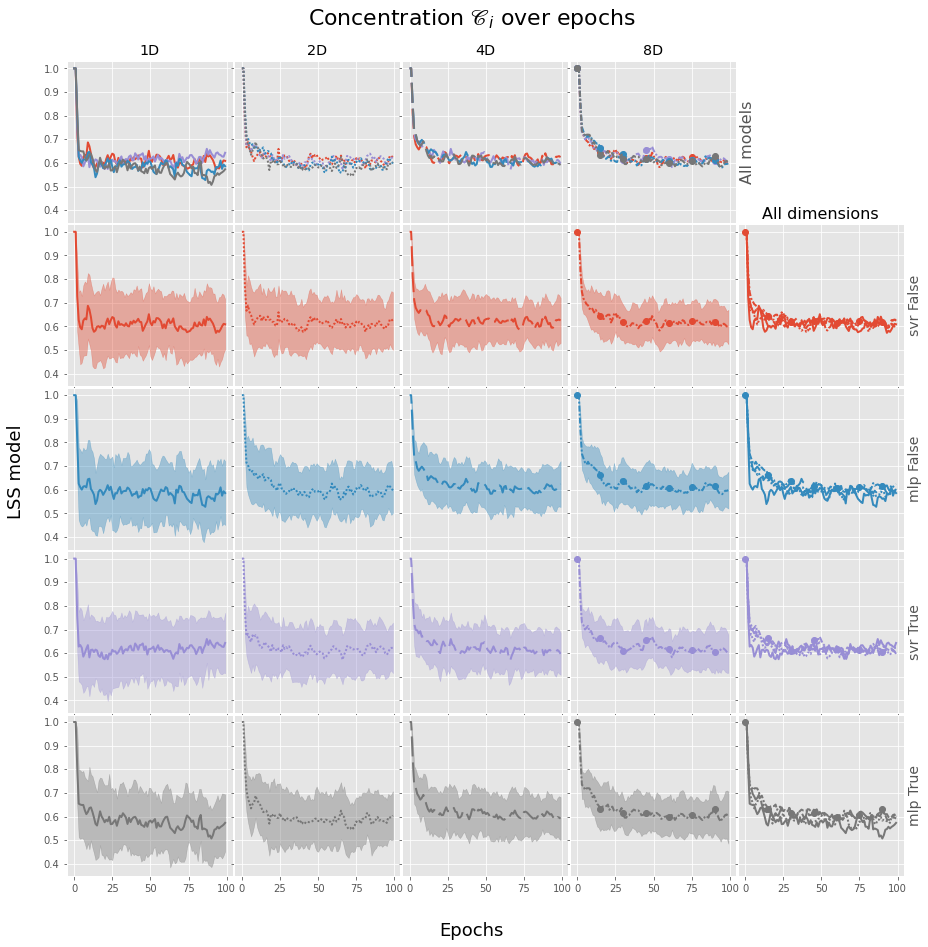

In [32]:

fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(15, 15), sharex=True, sharey=True)


fig.subplots_adjust(hspace=0.01, wspace=0.01)

lw_st = 2
markevery = 15
markers =["","", "","o"]
ln_style =["solid", (0,(1,1)),(5,(10,3)),(0,(3,1,1,1))]

adj_alpha = .4
for enow, now in enumerate([1,2,4,8]):  ### COLUMNS
    # Collect data
    for ewm, wm in enumerate(which_model):  ## WILL BE USED FOR ROW 
        for ema, ma in enumerate(multi_armed):  ## WILL BE USED FOR ROW 
            
            mean_now = concentrations[now][wm][ma]["mean"]
            std_now = concentrations[now][wm][ma]["std"]
            M = concentrations[now][wm][ma]["matrix"]
            
            # Marginals
            ax[0, enow].plot(
                mean_now,lw = lw_st, alpha =1, color = "C"+str(ewm+2*ema), label = str(wm) + "_"+str(ma),
                ms = 2*enow, marker = markers[enow], markevery=markevery, linestyle = ln_style[enow]
            )
            ax[ewm +2*ema+1, 4].plot(
                mean_now,lw = lw_st, alpha =1, color = "C"+str(ewm+2*ema), label = str(wm) + "_"+str(ma),
                ms = 2*enow, marker = markers[enow], markevery=markevery, linestyle = ln_style[enow]
            )
            ax[ewm +2*ema+1, enow].plot(
                mean_now,lw = lw_st, alpha =1, color = "C"+str(ewm+2*ema), label = str(wm) + "_"+str(ma),
                ms = 2*enow, marker = markers[enow], markevery=markevery, linestyle = ln_style[enow]
            )
            ax[ewm +2*ema+1, enow].fill_between(
                np.arange(M.shape[1]),
                mean_now - std_now, mean_now+std_now, alpha = adj_alpha, color = "C"+str(ewm+2*ema))
                    
    ax[0, enow].set_title(str(now)+"D")
    
fig.delaxes(ax[0,4])
ax[1,4].set_title ("All dimensions", size = 16)    
ax[0, 3].yaxis.set_label_position("right")
ax[0, 3].set_ylabel ("All models", size = 16)            

for ewm, wm in enumerate(which_model):
    for ema, ma in enumerate(multi_armed):
        ax[ewm +2*ema+1, 4].yaxis.set_label_position("right")
        label = str(wm) + " "+str(ma)
        ax[ewm +2*ema+1, 4].set_ylabel (label, size = 14)

fig.text(0.07, 0.5, 'LSS model', va='center', rotation='vertical',fontsize = 18)
fig.text(0.5, 0.07, 'Epochs', ha='center',fontsize = 18)
fig.suptitle(r"Concentration $\mathscr{C}_i$ over epochs", fontsize = 22, y = .93)
plt.show()    

In [19]:
dict_ML = {}

for i in[1,2, 4, 8]:
    for step in[12.5, 25, 50]:

        with open (
            str(i)
            +"/toy_model_"+str(i)+"D_100_sim_annealing_step_"
            +str(step).replace(".","__")+".pickle", 'rb'
        ) as pickled_dic:
            dict_ML["SA_" + str(i)  +"_"+str(step).replace(".","_") ] =   pickle.load (pickled_dic)

    for model in["svr","mlp"]:
        for type_ml in["True","False"]:
            with open (
                str(i)+"/50toy_model_"+str(i)+"D_lss_"
                +model+"_multi_armed_"+type_ml+".pickle", 'rb'
            ) as pickled_dic:
                aux = pickle.load (pickled_dic)
                combine_aux =[aux[str(i)][1] for i in range(50)]
                dict_ML[model +"_"+ str(i) +"_"+type_ml ]  = combine_aux

In [20]:
dict_ML_mean = {}
dict_ML_std = {}
dict_ML_log_ave = {}
for key_now in list(dict_ML.keys()):
    
    for i in[1,2, 4, 8]:
        if "_"+str(i)+"_" in key_now:
            dict_ML_log_ave[key_now+"_log_av"] = np.exp(np.log(dict_ML[key_now])/i)
            dict_ML_log_ave[key_now+"_log_av_mean"] = np.mean(dict_ML_log_ave[key_now+"_log_av"],axis = 0)
    
    dict_ML_mean[key_now + "_mean"] = np.mean(dict_ML[key_now], axis = 0)
    dict_ML_std[key_now + "_std"]= np.std(dict_ML[key_now], axis = 0)

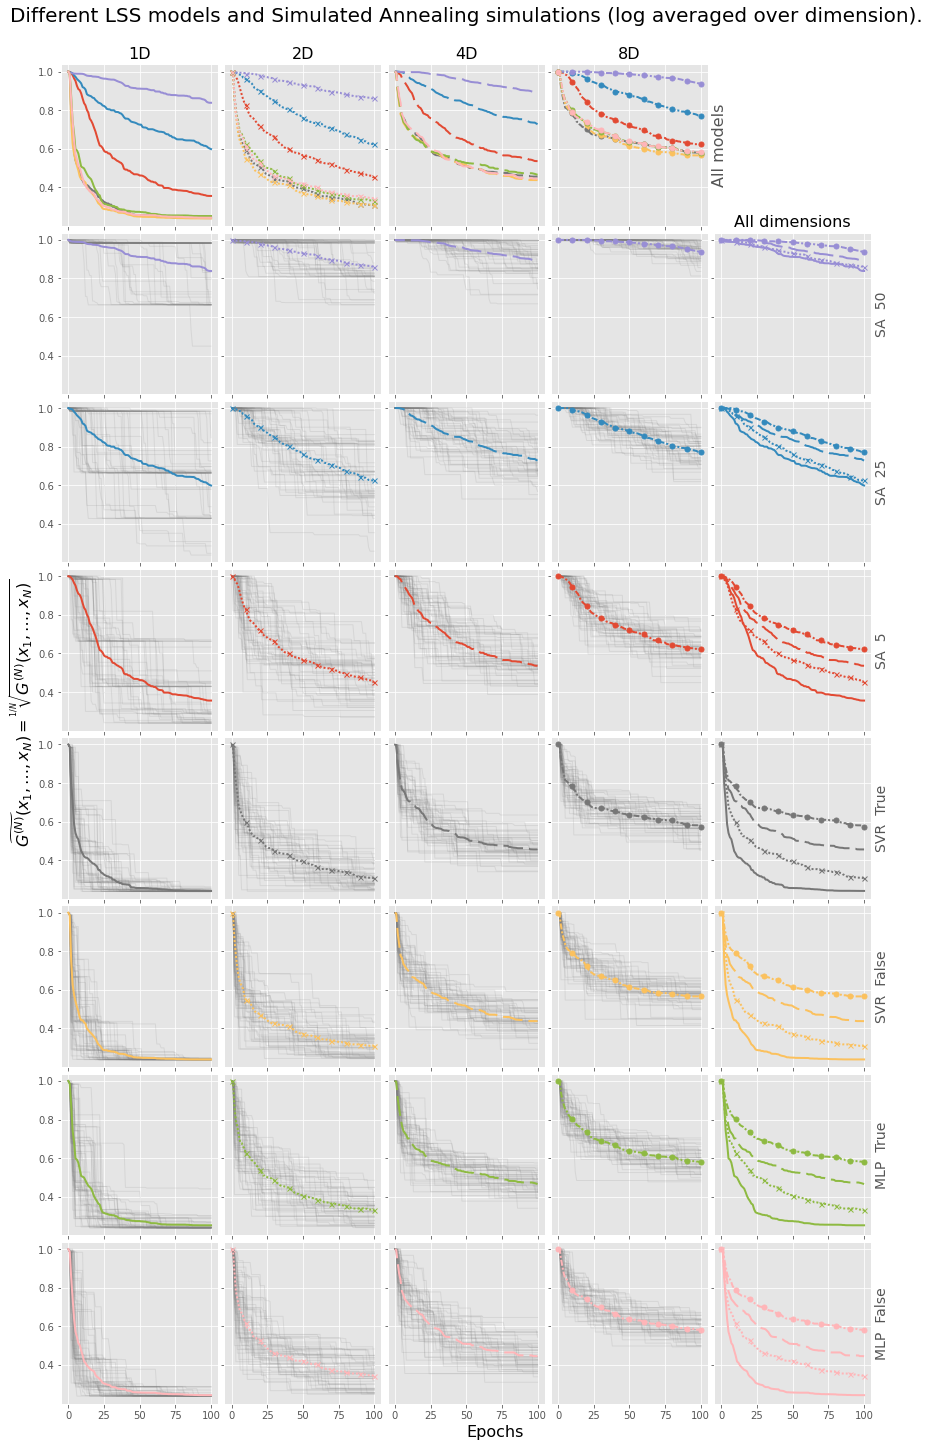

In [21]:
## AVERAGED VERSION
permute_rows =[0,3, 2, 1, 4, 5, 6, 7]

fig, ax = plt.subplots(
    nrows = 8, ncols=5, figsize = (12.5,20),
    sharey = True, sharex=True)

lw_st = 2
markers =["","x", "","o"]
ln_style =["solid", (0,(1,1)),(5,(10,3)),(0,(3,1,1,1))]
dimension = np.power(2,np.arange(4))
for col in range(4):
    target =[key for key in dict_ML.keys() if f"_{dimension[col]}_" in key]
    for row, name in enumerate(target):
        if row == 0:
            ax[permute_rows[row], col].set_title (str(dimension[col])+"D", size = 16)
            
        for a in dict_ML_log_ave[name+"_log_av"]:
            ax[permute_rows[row+1], col].plot(a, color = "gray", alpha = .15, lw = 1)
        #mean
        ax[0, col].plot(
            dict_ML_log_ave[name+"_log_av_mean"], color = "C"+str(row), lw = lw_st,
            ms = 5, marker = markers[col], markevery=10, linestyle = ln_style[col])
        ax[permute_rows[row+1], col].plot(
            dict_ML_log_ave[name+"_log_av_mean"], color = "C"+str(row), lw = lw_st,
            ms = 5, marker = markers[col], markevery=10, linestyle = ln_style[col])
        ax[permute_rows[row+1], 4].plot(
            dict_ML_log_ave[name+"_log_av_mean"], color = "C"+str(row), lw = lw_st, 
            ms = 5, marker = markers[col], markevery=10, linestyle = ln_style[col])

fig.delaxes(ax[0,4])
ax[0, 3].yaxis.set_label_position("right")
ax[0, 3].set_ylabel ("All models", size = 16)            

target =['SA_8_50', 'SA_8_25', 'SA_8_12_5', 'svr_8_True', 'svr_8_False', 'mlp_8_True', 'mlp_8_False']
for row, name in enumerate(target):
    ax[row+1, 4].yaxis.set_label_position("right")
    label = name.split("_")[0].upper() +"  "+ name.split("_")[-1]
    ax[row+1, 4].set_ylabel (label, size = 14)
        
ax[1,4].set_title ("All dimensions", size = 16)

fig.text(
    -0.01, 0.5, 
    r'$\widetilde{G^{(N)}}(x_1,\ldots, x_N)= \sqrt[1/N]{G^{(N)}(x_1,\ldots, x_N)}$', 
    va='center', 
    rotation='vertical', 
    size = 16)
fig.text(
    0.5, 0.0, 
    'Epochs', 
    va='center', 
    rotation='horizontal', 
    size = 16)

fig.suptitle(
    r"Different LSS models and Simulated Annealing simulations (log averaged over dimension).",
    size = 20, y = .99)


plt.subplots_adjust(wspace=.04, hspace=.04,left=0.05, right=0.95, top=0.95, bottom=0.02)
plt.show()